In [1]:
# `pandas` for data loading/transformations
import pandas as pd

# `seaborn` for visualization
import seaborn as sns

# `matplotlib` for customizing visuals
import matplotlib.pyplot as plt
%matplotlib inline

# `numpy` for manipulating arrays/lists
import numpy as np

In [2]:
# # UNCOMMENT BELOW TO USE WITH GOOGLE COLAB
# # Import PyDrive and associated libraries.
# # This only needs to be done once per notebook.
# # Documentation found here: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=7taylj9wpsA2
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # Authenticate and create the PyDrive client.
# # This only needs to be done once per notebook.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [3]:
# # UNCOMMENT BELOW TO USE WITH GOOGLE COLAB
# # Link to data file stored in Drive: https://drive.google.com/file/d/18ut1gQQ65aoQeV0iUQlneNhecpGR51dz/view?usp=sharing
# file_id = '18ut1gQQ65aoQeV0iUQlneNhecpGR51dz' # notice where this string comes from in link above

# imported_file = drive.CreateFile({'id': file_id}) # creating an accessible copy of the shared data file
# print(imported_file['title'])  # it should print the title of desired file
# imported_file.GetContentFile(imported_file['title']) # refer to it in this notebook by the same name as it has in Drive

In [4]:
# load our data
ppp_data = pd.read_csv('../datasets/public_150k_plus_borrower_fingerprint_a.csv')

In [5]:
# first, sanity check our data
print(ppp_data[ppp_data['JobsReported'] <= 0])

# drop the records with no value in `JobsReported`
ppp_data.drop(labels=[437083,765398], axis=0)

        LoanNumber DateApproved  SBAOfficeCode ProcessingMethod  \
437083  5780187005   04/06/2020            766              PPP   
765398  4563247009   04/03/2020            897              PPP   

                        BorrowerName                BorrowerNameFingerprint  \
437083  RELIANT TRANSPORTATION, INC.  inc reliant transportation lincoln NE   
765398       WEEDEN CONSTRUCTION LLC      construction llc weeden banner WY   

            BorrowerAddress BorrowerCity BorrowerState BorrowerZip  ...  \
437083   4411 S 86th Street      Lincoln            NE  68526-9225  ...   
765398  402 MURPHY GULCH RD       BANNER            WY  82832-9726  ...   

       HEALTH_CARE_PROCEED DEBT_INTEREST_PROCEED  \
437083                 NaN                   NaN   
765398                 NaN                   NaN   

                           BusinessType  OriginatingLenderLocationID  \
437083                      Corporation                        42246   
765398  Limited  Liability Compan

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerNameFingerprint,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,...,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit
0,9547507704,05/01/2020,464,PPP,"SUMTER COATINGS, INC.",coatings inc sumter sumter,2410 Highway 15 South,Sumter,NaN,29150-9662,...,NaN,NaN,Corporation,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN
1,9777677704,05/01/2020,464,PPP,"PLEASANT PLACES, INC.",inc places pleasant charleston north,7684 Southrail Road,North Charleston,NaN,29420-9000,...,NaN,NaN,Sole Proprietorship,19248,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,NaN
2,5791407702,05/01/2020,1013,PPP,BOYER CHILDREN'S CLINIC,boyer childrens clinic seattle,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,...,NaN,NaN,Non-Profit Organization,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y
3,6223567700,05/01/2020,920,PPP,KIRTLEY CONSTRUCTION INC,construction inc kirtley bernardino san,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,...,NaN,NaN,Corporation,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,NaN
4,9662437702,05/01/2020,101,PPP,AERO BOX LLC,aero box llc a n,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766494,2665238309,01/21/2021,897,PPS,RHOADES DENTAL P.C.,dental pc rhoades newcastle WY,17 S Seneca Ave,Newcastle,WY,82701-2816,...,NaN,NaN,Corporation,77248,Pinnacle Bank-Wyoming,CODY,WY,Unanswered,Unanswered,NaN
766495,4395967002,04/03/2020,897,PPP,"ROY E PAULSON, JR., P.C.",e jr paulson pc roy casper WY,102 N. Kenwood,CASPER,WY,82601-2724,...,NaN,NaN,Corporation,42366,Platte Valley Bank,TORRINGTON,WY,Male Owned,Non-Veteran,NaN
766496,6985647108,04/14/2020,897,PPP,"SWEETWATER COUNTY CHILD DEVELOPMENTAL CENTER, ...",center child county developmental inc sweetwat...,1715 HITCHING POST DR,GREEN RIVER,WY,82935-5783,...,NaN,NaN,Non-Profit Childcare Center,122813,NebraskaLand National Bank,NORTH PLATTE,NE,Unanswered,Unanswered,Y
766497,9054647103,04/15/2020,897,PPP,EDEN LIFE CARE,care eden life sheridan WY,30 N. Gould Street Suite 4000,SHERIDAN,WY,82801,...,NaN,NaN,Corporation,25901,Small Business Bank,LENEXA,KS,Unanswered,Unanswered,NaN


In [6]:
# calculate the dollars per job
dollars_per_job = ppp_data['CurrentApprovalAmount']/ppp_data['JobsReported']

# insert the new column into our original dataset
ppp_data.insert(3, 'Dollars per Job', dollars_per_job)

In [7]:
# use `ProcessingMethod` value to identify second-round loans
pps_loans = ppp_data[ppp_data['ProcessingMethod'] == 'PPS']

# select all second-round loans that have a value of $2M
pps_got_2M = pps_loans[pps_loans['CurrentApprovalAmount'] == 2000000.00]
print("Actual $2M second-round loans:")
print(pps_got_2M.shape)

Actual $2M second-round loans:
(1459, 52)


In [8]:
# pull fingerprints of businesses approved for $2M second-round loans
biz_names = pd.unique(pps_got_2M['BorrowerNameFingerprint'])

# convert that list to a DataFrame
biz_names_df = pd.DataFrame(biz_names, columns=['BorrowerNameFingerprint'])

# create an array of the same length as `biz_names_df`; fill with flag value
fill_column = np.full((len(biz_names),1), '2Mil2ndRnd')
biz_names_df['GotSecond'] = fill_column

# now merge this new, two-column DataFrame back onto our full_data list
second_round_max = pd.merge(ppp_data, biz_names_df, on='BorrowerNameFingerprint')

In [9]:
# all loans whose fingerprints match those of businesses that got $2M
# in the second round should have `2Mil2ndRnd` in the `GotSecond` column
second_max_all_loans = second_round_max[
 second_round_max['GotSecond'] == '2Mil2ndRnd']

# sbould be 2x the number of businesses approved for $2M second-round
print('Total # of loans approved for most orgs that got $2M for second round:')
print(second_max_all_loans.shape)

Total # of loans approved for most orgs that got $2M for second round:
(2634, 53)


In [10]:
# how much money were these businesses approved to get from the PPP, total?
total_funds = second_max_all_loans['CurrentApprovalAmount'].sum()
print("Total funds approved for identified orgs that could have " + \
 "second-round max:")
print(total_funds)

Total funds approved for identified orgs that could have second-round max:
6250357574.440001


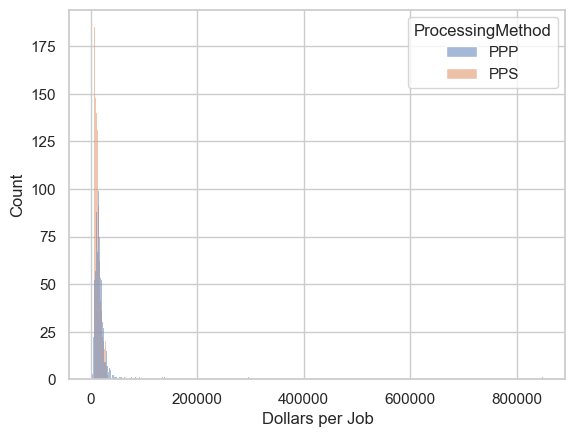

In [11]:
# now, let's plot that new column on our selected dataset
# set the seaborn theme
sns.set_theme(style="whitegrid")

# the `matplotlib` `subplots()` to plot charts side by side
fig, ((row1col1)) = plt.subplots(nrows=1, ncols=1)

# plot the histogram of our date-based analysis
date_based = sns.histplot(data=second_max_all_loans, x='Dollars per Job',
 hue='ProcessingMethod', ax=row1col1)

# show the plots!
plt.show()